In [2]:
2+2

4

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Modeling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings 
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##### Segreggating Independent and Dependent variable

In [5]:
X = df.drop(columns=['math_score'],axis=1)

In [6]:
y = df['math_score']

In [8]:
# Create a Column Transformer with 3 type of Transformer
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import StandardScaler
from sklearn.compose import  ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]


)

In [9]:
X = preprocessor.fit_transform(X)

In [10]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

- Seperate datasets into train,test,split


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

#### Create an Evaluate fnction to give all metrics after model Training

In [15]:
from sklearn.metrics import mean_absolute_error

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square


In [16]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "KNeighborsRegressor" : KNeighborsRegressor(),
    "DecisionTreeRegressor" : DecisionTreeRegressor(),
    "RandomForestRegressor" : RandomForestRegressor(),
    "AdaBoostRegressor" : AdaBoostRegressor(),
    "CatBoostRegressor" : CatBoostRegressor(verbose=0),
    "XGBRegressor" : XGBRegressor()
}

model_list = []
r2_list = []

for i in range((len(models))):
    model = list(models.values())[i]
    # Train the Model
    model.fit(X_train,y_train)

    # Predict the Model
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the Model through train test dataset
    model_train_mae,model_train_rmse,model_train_mse,model_train_r2 = evaluate_model(y_train,y_train_pred)

    model_test_mae,model_test_rmse,model_test_mse,model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance for Training Dataset")
    print("- Root Mean Squared Error: {:.4f} ".format(model_train_rmse))

    print("- Mean Squared Error: {:.4f} ".format(model_train_mse))
    print("- Mean Absolute Error: {:.4f} ".format(model_train_mae))
    print("- R2 Score: {:.4f} ".format(model_train_r2))
    print("\n")


    print("------------------------------------------")


    print("Model Performance for Testing Dataset")
    print("- Root Mean Squared Error: {:.4f} ".format(model_test_rmse))
    print("- Mean Squared Error: {:.4f} ".format(model_test_mse))
    print("- Mean Absolute Error: {:.4f} ".format(model_test_mae))
    print("- R2 Score: {:.4f} ".format(model_test_r2))
    r2_list.append(model_test_r2)
    print("\n")
    print("==========================================")
    print("\n")





Linear Regression
Model Performance for Training Dataset
- Root Mean Squared Error: 28.3349 
- Mean Squared Error: 5.3231 
- Mean Absolute Error: 4.2667 
- R2 Score: 0.8743 


------------------------------------------
Model Performance for Testing Dataset
- Root Mean Squared Error: 29.0952 
- Mean Squared Error: 5.3940 
- Mean Absolute Error: 4.2148 
- R2 Score: 0.8804 




Lasso
Model Performance for Training Dataset
- Root Mean Squared Error: 43.4784 
- Mean Squared Error: 6.5938 
- Mean Absolute Error: 5.2063 
- R2 Score: 0.8071 


------------------------------------------
Model Performance for Testing Dataset
- Root Mean Squared Error: 42.5064 
- Mean Squared Error: 6.5197 
- Mean Absolute Error: 5.1579 
- R2 Score: 0.8253 




Ridge
Model Performance for Training Dataset
- Root Mean Squared Error: 28.3378 
- Mean Squared Error: 5.3233 
- Mean Absolute Error: 4.2650 
- R2 Score: 0.8743 


------------------------------------------
Model Performance for Testing Dataset
- Root Mean

  File "c:\ProgramData\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 227, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\ProgramData\anaconda3\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\ProgramData\anaconda3\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\ProgramData\anaconda3\lib\subprocess.py", line 1440, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


KNeighborsRegressor
Model Performance for Training Dataset
- Root Mean Squared Error: 32.5953 
- Mean Squared Error: 5.7092 
- Mean Absolute Error: 4.5180 
- R2 Score: 0.8554 


------------------------------------------
Model Performance for Testing Dataset
- Root Mean Squared Error: 52.5860 
- Mean Squared Error: 7.2516 
- Mean Absolute Error: 5.6160 
- R2 Score: 0.7839 




DecisionTreeRegressor
Model Performance for Training Dataset
- Root Mean Squared Error: 0.0781 
- Mean Squared Error: 0.2795 
- Mean Absolute Error: 0.0187 
- R2 Score: 0.9997 


------------------------------------------
Model Performance for Testing Dataset
- Root Mean Squared Error: 63.9050 
- Mean Squared Error: 7.9941 
- Mean Absolute Error: 6.3050 
- R2 Score: 0.7374 




RandomForestRegressor
Model Performance for Training Dataset
- Root Mean Squared Error: 5.3711 
- Mean Squared Error: 2.3176 
- Mean Absolute Error: 1.8337 
- R2 Score: 0.9762 


------------------------------------------
Model Performance

## Final Results

In [17]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model','R2_Score']).sort_values(by='R2_Score',ascending=False)

,Model,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,RandomForestRegressor,0.852561
7,CatBoostRegressor,0.851632
6,AdaBoostRegressor,0.844711
8,XGBRegressor,0.827797
1,Lasso,0.825320
3,KNeighborsRegressor,0.783898
4,DecisionTreeRegressor,0.737382


# Let's go For Linear Regression

In [18]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(f"R2 Score for Linear Regression Model: {score:.2f}%")

R2 Score for Linear Regression Model: 88.04%


#### Plot y_pred and y_test

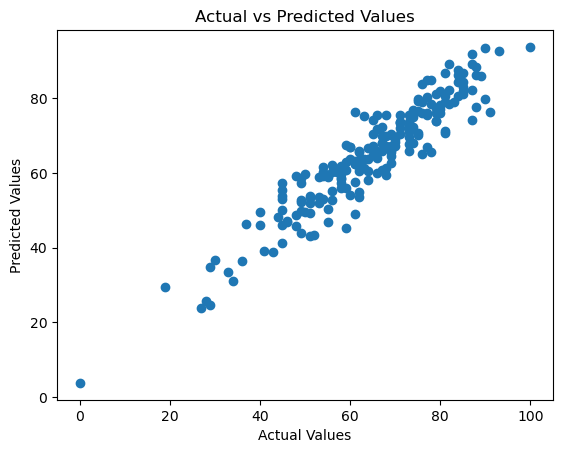

In [19]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


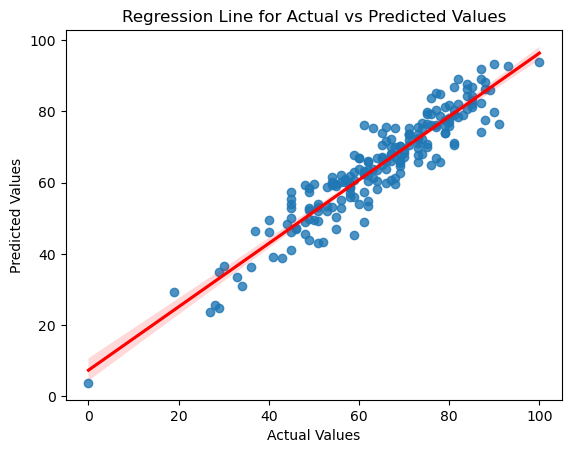

In [20]:
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Regression Line for Actual vs Predicted Values")
plt.show()

#### Difference Between Actual and predicted values


In [24]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,'Difference': y_test-y_pred})
pred_df.head()


,Actual,Predicted,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
